In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#load the dataset
df = pd.read_csv("Fish.csv")
print('Shape of the fish dataset = ', df.shape)

Shape of the fish dataset =  (159, 7)


In [3]:
df.head(10)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274
6,Bream,500.0,26.8,29.7,34.5,14.1795,5.2785
7,Bream,390.0,27.6,30.0,35.0,12.6700,4.6900
8,Bream,450.0,27.6,30.0,35.1,14.0049,4.8438
9,Bream,500.0,28.5,30.7,36.2,14.2266,4.9594


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [5]:
#checking for null values
df.isnull()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
154,False,False,False,False,False,False,False
155,False,False,False,False,False,False,False
156,False,False,False,False,False,False,False
157,False,False,False,False,False,False,False


There are no null or nan values

In [6]:
#Number of species in the dataset
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [7]:
df_sp = df.Species.value_counts()
df_sp = pd.DataFrame(df_sp)

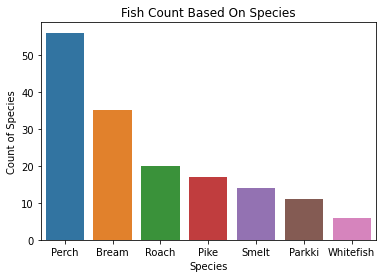

In [8]:
sns.barplot(x= df_sp.index, y = df_sp.Species)
plt.xlabel('Species')
plt.ylabel('Count of Species')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Fish Count Based On Species')
plt.show()

The right approach would be to divide the dataset and do the prediction for each species. But since we don't have enough data we will do the prediction without taking in consideration the different species.

In [9]:
#removing the null values
df1 = df.drop([40])
print('New shape of fish dataset is = ', df1.shape)

New shape of fish dataset is =  (158, 7)


In [10]:
df1.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


In [11]:
#removing length1, length2 and length3 so that we can get the weight prediction only based on height and width
df2 = df1.drop(['Length1', 'Length2', 'Length3'], axis =1)
print('New shape of dataset is = ', df2.shape)
df2.head()

New shape of dataset is =  (158, 4)


,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


Text(0.5, 1.0, 'Correlation Matrix')

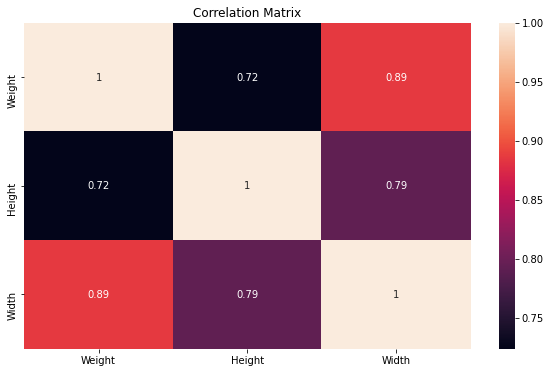

In [12]:
plt.rcParams["figure.figsize"] = (10,6)
sns.heatmap(df2.corr(), annot =True)
plt.title('Correlation Matrix')

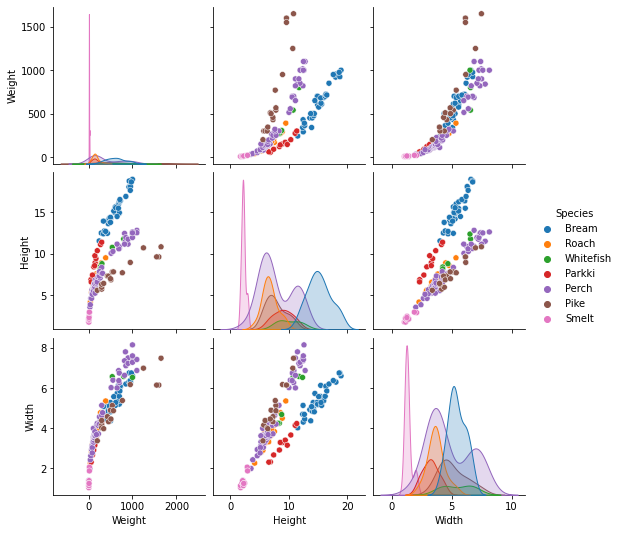

In [13]:
sns.pairplot(df2, kind = 'scatter', hue = 'Species')

In [14]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,158.0,400.847468,357.697796,5.9000,121.25000,281.50000,650.00000,1650.000
Height,158.0,8.986790,4.295191,1.7284,5.94060,7.78900,12.37185,18.957
Width,158.0,4.424232,1.689010,1.0476,3.39865,4.27705,5.58675,8.142


In [15]:
X = df2[['Height','Width']]
X.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [16]:
y = df2[['Weight']]
y.head()

,Weight
0,242.0
1,290.0
2,340.0
3,363.0
4,430.0


In [17]:
#splitting and training the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=101)

print('Dimension of X_train = ', X_train.shape)
print('Dimension of X_test = ', X_test.shape)
print('Dimension of y_train = ', y_train.shape)
print('Dimension of y_train = ', y_test.shape)

Dimension of X_train =  (105, 2)
Dimension of X_test =  (53, 2)
Dimension of y_train =  (105, 1)
Dimension of y_train =  (53, 1)


In [18]:
#linear regression
model_lr = LinearRegression()

In [19]:
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
print('coeficient= ', model_lr.coef_)
print('intercept = ', model_lr.intercept_)
print('score = ', model_lr.score(X_test,y_test))

coeficient=  [[  5.99585617 171.17623751]]
intercept =  [-413.90841767]
score =  0.6835383642227588


In [21]:
#prediction
predictedWeight = pd.DataFrame(model_lr.predict(X_test), columns=['Predicted Weight']) 
actualWeight = pd.DataFrame(y_test)
actualWeight = actualWeight.reset_index(drop=True) 
df_actual_vs_predicted = pd.concat([actualWeight,predictedWeight],axis =1)
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52
Weight,430.000000,150.000000,270.000000,300.000000,975.000000,7.500000,80.000000,1550.000000,700.000000,51.500000,820.000000,145.000000,120.000000,150.000000,390.00000,130.000000,85.000000,170.000000,430.00000,290.000000,925.000000,120.000000,120.000000,180.0000,12.200000,955.000000,456.000000,260.000000,13.400000,19.900000,1600.000000,145.000000,180.000000,161.00000,273.000000,700.000000,300.000000,200.000000,725.00000,514.000000,6.700000,850.000000,120.000000,300.000000,770.000000,170.000000,130.000000,145.000000,140.000000,218.000000,145.000000,685.000000,620.000000
Predicted Weight,413.189425,263.558596,362.172474,515.378778,852.804188,-203.520154,142.004788,695.358605,579.927289,64.094339,787.753896,243.155855,235.179932,203.060647,559.61103,229.305952,91.063054,226.208087,539.52282,397.936276,853.927318,206.009293,186.659724,297.1962,-185.292734,771.561532,369.650702,371.114072,-182.115842,-74.652983,695.358605,279.064274,255.229569,249.12988,361.927964,803.567002,311.890164,275.244775,720.34779,676.368617,-224.158597,874.060567,223.304448,332.065526,552.383211,261.347065,241.546001,233.166548,201.204801,338.424208,184.890136,601.271774,582.991111


Text(0.5, 1.0, 'Weight of the fish from Test Dataset Vs Weight of the fish Predicted By Model')

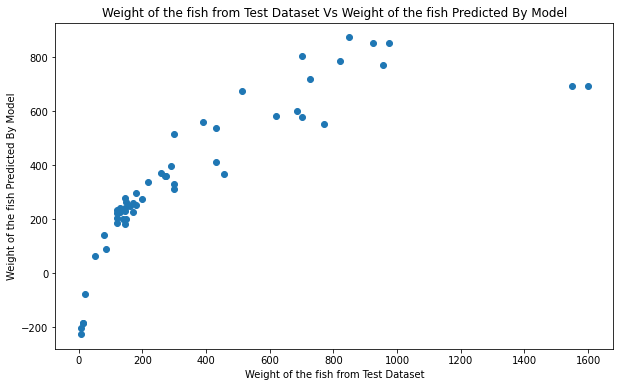

In [22]:
plt.scatter(y_test, model_lr.predict(X_test))
plt.xlabel('Weight of the fish from Test Dataset')
plt.ylabel('Weight of the fish Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6)
plt.title("Weight of the fish from Test Dataset Vs Weight of the fish Predicted By Model")

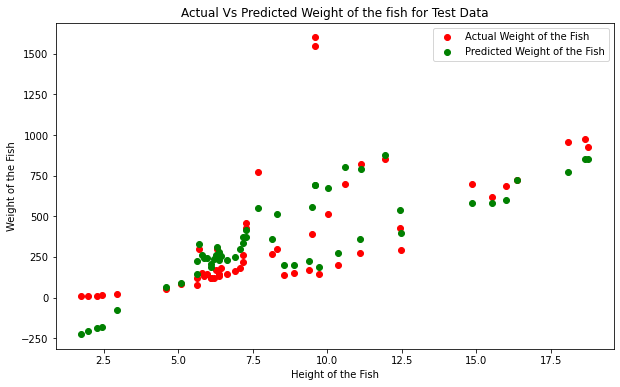

In [23]:
plt.scatter(X_test['Height'], y_test, color='red', label = 'Actual Weight of the Fish')
plt.scatter(X_test['Height'], model_lr.predict(X_test), color='green', label = 'Predicted Weight of the Fish')
plt.xlabel('Height of the Fish')
plt.ylabel('Weight of the Fish')
plt.rcParams["figure.figsize"] = (10,6)
plt.title('Actual Vs Predicted Weight of the fish for Test Data')
plt.legend()
plt.show()

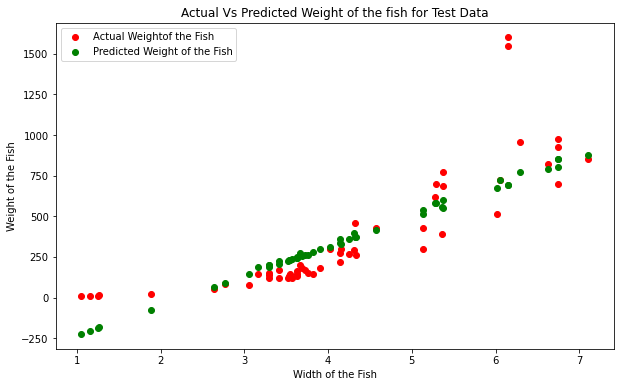

In [24]:
plt.scatter(X_test['Width'], y_test, color='red', label = 'Actual Weightof the Fish ')
plt.scatter(X_test['Width'], model_lr.predict(X_test), color='green', label = 'Predicted Weight of the Fish')
plt.xlabel('Width of the Fish')
plt.ylabel('Weight of the Fish')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title('Actual Vs Predicted Weight of the fish for Test Data')
plt.legend()
plt.show()

In [25]:
import pickle
pickle_model = open("model_lr.pkl", "wb")
pickle.dump(model_lr, pickle_model)
pickle_model.close()